In [28]:
# importing needed libraries 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [29]:
def createXY(slope):
    # creating the data 
    N = 50
    x = torch.randn(N,1)
    y = slope * x + torch.randn(N,1)/2

    return x, y

In [30]:
def build_train(x, y):
    # building the model
    regressionANN = nn.Sequential(
        nn.Linear(1,1), # input layer 
        nn.ReLU(),      # activation layer
        nn.Linear(1,1)  # output layer
    )
    
    # setting up parameters
    learningRate = .05
    lossFunction = nn.MSELoss()
    optimizer = torch.optim.SGD(regressionANN.parameters(),lr=learningRate)
    numEpochs = 500
    losses = torch.zeros(numEpochs)

    # Training time
    for epoch in range(numEpochs):

        # forward pass
        yHat = regressionANN(x)

        # compute loss
        loss = lossFunction(yHat,y)
        losses[epoch] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = regressionANN(x)

    return predictions, losses

In [31]:
# training and tracking performance data
slopes = np.linspace(-2,2,21)
expCount = 50

results = np.zeros((len(slopes),expCount,2))

for slopeIDX in range(len(slopes)):
    for expIDX in range(expCount):
        # create dataset 
        x,y = createXY(slopes[slopeIDX])
        yHat,losses = build_train(x,y)

        # store final loss and performance
        results[slopeIDX,expIDX,0] = losses[-1]
        results[slopeIDX,expIDX,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]

# correlation can be 0 if the model didn't perform well 
results[np.isnan(results)] = 0 # setting nan's to 0


c:\Users\drake\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\drake\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


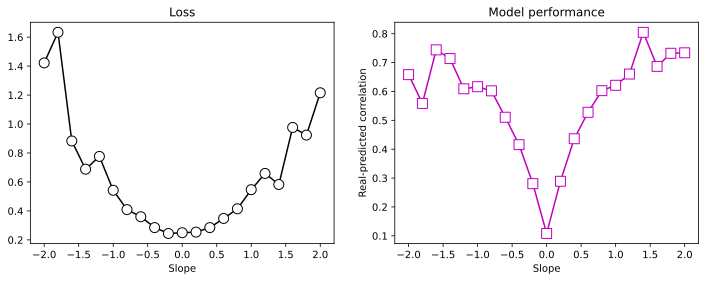

In [32]:
# plotting results
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()